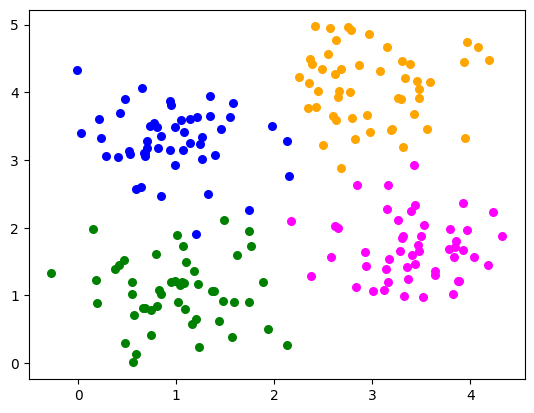

In [1]:
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

n_samples = 200
blob_centers = ([1,1], [3, 4],[1, 3.3], [3.5, 1.8])
data , labels = make_blobs(n_samples=n_samples,
                          centers= blob_centers,
                          cluster_std=0.5,
                          random_state=0)

colours = ('green', 'orange', "blue", "magenta")
fig, ax = plt.subplots()

for n_class in range(len(blob_centers)):
    ax.scatter(data[labels== n_class][:, 0],
              data[labels==n_class][:, 1],
              c=colours[n_class],
              s=30,
              label=str(n_class))

In [2]:
from sklearn.model_selection import train_test_split
datasets = train_test_split(data,
                        labels,
                        test_size=0.2)
train_data, test_data, train_labels, test_labels = datasets


In [3]:
from sklearn.neural_network import MLPClassifier

clf = MLPClassifier(solver='lbfgs',
                   alpha=1e-5,
                   hidden_layer_sizes=(6,),
                   random_state=1)
clf.fit(train_data, train_labels)

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(6,), random_state=1,
              solver='lbfgs')

In [4]:
clf.score(train_data, train_labels)

0.9875

In [5]:
from sklearn.metrics import accuracy_score
predictions_train = clf.predict(train_data)
predictions_test = clf.predict(test_data)
train_score = accuracy_score(predictions_train, train_labels)
print("score on train data: ", train_score)
test_score = accuracy_score(predictions_test, test_labels)
print("score on train data: ", test_score)


score on train data:  0.9875
score on train data:  0.975


In [6]:
predictions_train[:20]

array([2, 0, 1, 1, 0, 1, 2, 2, 3, 1, 3, 1, 0, 2, 0, 0, 2, 3, 0, 1])

### Multi_layer_Perceptron

In [7]:
from sklearn.neural_network import MLPClassifier
X = [[0., 0.], [0., 1.], [1., 0.], [1., 1.]]
y = [0, 0, 0, 1]
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(5, 2), random_state=1)
print(clf.fit(X, y))


MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), random_state=1,
              solver='lbfgs')


In [8]:
print("weights between input and first hidden layer:")
print(clf.coefs_[0])
print("\nweights between first hidden and second hidden layer:")
print(clf.coefs_[1])

weights between input and first hidden layer:
[[-0.14203691 -1.18304359 -0.85567518 -4.53250719 -0.60466275]
 [-0.69781111 -3.5850093  -0.26436018 -4.39161248  0.06644423]]

weights between first hidden and second hidden layer:
[[ 0.29179638 -0.14155284]
 [ 4.02666592 -0.61556475]
 [-0.51677234  0.51479708]
 [ 7.37215202 -0.31936965]
 [ 0.32920668  0.64428109]]


In [9]:
print("w0 = ", clf.coefs_[0][0][0])
print("w1 = ", clf.coefs_[0][1][0])


w0 =  -0.14203691267827181
w1 =  -0.6978111149778699


In [10]:
clf.coefs_[0][:,0]

array([-0.14203691, -0.69781111])

In [11]:
for i in range(len(clf.coefs_)):
    number_neurons_in_layer = clf.coefs_[i].shape[1]
    for j in range(number_neurons_in_layer):
        weights = clf.coefs_[i][:,j]
        print(i, j, weights, end=", ")
        print()
print()


0 0 [-0.14203691 -0.69781111], 
0 1 [-1.18304359 -3.5850093 ], 
0 2 [-0.85567518 -0.26436018], 
0 3 [-4.53250719 -4.39161248], 
0 4 [-0.60466275  0.06644423], 
1 0 [ 0.29179638  4.02666592 -0.51677234  7.37215202  0.32920668], 
1 1 [-0.14155284 -0.61556475  0.51479708 -0.31936965  0.64428109], 
2 0 [-4.96774269 -0.86330397], 



intercepts_ is a list of bias vectors, where the vector at index i represents the bias values added to layer i+1.

In [12]:
print("Bias values for first hidden layer:")
print(clf.intercepts_[0])
print("\nBias values for second hidden layer:")
print(clf.intercepts_[1])


Bias values for first hidden layer:
[-0.14962269 -0.59232707 -0.5472481   7.02667699 -0.87510813]

Bias values for second hidden layer:
[-3.61417672 -0.76834882]


In [14]:
result = clf.predict([[0, 0], [0, 1],
                    [1, 0], [0, 1],
                    [1, 1], [2., 2.],
                    [1.3, 1.3], [2, 4.8]])


In [15]:
prob_results = clf.predict_proba([[0, 0], [0, 1],
                                [1, 0], [0, 1],
                                [1, 1], [2., 2.],
                                [1.3, 1.3], [2, 4.8]])
print(prob_results)


[[1.00000000e+000 5.25723951e-101]
 [1.00000000e+000 3.71534882e-031]
 [1.00000000e+000 6.47069178e-029]
 [1.00000000e+000 3.71534882e-031]
 [2.07145538e-004 9.99792854e-001]
 [2.07145538e-004 9.99792854e-001]
 [2.07145538e-004 9.99792854e-001]
 [2.07145538e-004 9.99792854e-001]]


### COMPLETE IRIS DATASET EXAMPLE

In [17]:
from sklearn.datasets import load_iris

iris = load_iris()

In [19]:
# splitting into train and test datasets

from sklearn.model_selection import train_test_split

datasets =  train_test_split(iris.data, iris.target,test_size=0.2)
train_data, test_data, train_labels, test_labels = datasets

In [20]:
# scaling the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# we fit the train data
scaler.fit(train_data)

# scaling the train data
train_data = scaler.transform(train_data)
test_data = scaler.transform(test_data)
print(train_data[:3])

[[-0.09145574 -1.0341682   0.08647108 -0.06572133]
 [-0.34088047 -0.12166685  0.37959337  0.33529015]
 [-0.2161681   1.70333587 -1.26189148 -1.26875576]]


In [21]:
# Training the Model
from sklearn.neural_network import MLPClassifier

# creating an classifier from the model:
mlp = MLPClassifier(hidden_layer_sizes=(10, 5), max_iter=1000)

# let's fit the training data to our model
mlp.fit(train_data, train_labels)


MLPClassifier(hidden_layer_sizes=(10, 5), max_iter=1000)

In [22]:
from sklearn.metrics import accuracy_score
predictions_train = mlp.predict(train_data)
print(accuracy_score(predictions_train, train_labels))

predictions_test = mlp.predict(test_data)
print(accuracy_score(predictions_test, test_labels))


0.975
1.0


In [23]:
from sklearn.metrics import confusion_matrix
confusion_matrix(predictions_train, train_labels)

array([[36,  0,  0],
       [ 0, 41,  1],
       [ 0,  2, 40]], dtype=int64)

In [24]:
from sklearn.metrics import classification_report
print(classification_report(predictions_test, test_labels))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00         7
           2       1.00      1.00      1.00         9

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [25]:
import pickle
with open("data/mnist/pickled_mnist.pkl", "br") as fh:
    data = pickle.load(fh)
    
train_imgs = data[0]
test_imgs = data[1]
train_labels = data[2]
test_labels = data[3]
train_labels_one_hot = data[4]
test_labels_one_hot = data[5]

image_size = 28 # width and length
no_of_different_labels = 10 # i.e. 0, 1, 2, 3, ..., 9
image_pixels = image_size * image_size

In [26]:
mlp = MLPClassifier(hidden_layer_sizes=(100, ),
                        max_iter=480, alpha=1e-4,
                        solver='sgd', verbose=10,
                        tol=1e-4, random_state=1,
                        learning_rate_init=.1)

train_labels = train_labels.reshape(train_labels.shape[0],)
print(train_imgs.shape, train_labels.shape)

mlp.fit(train_imgs, train_labels)
print("Training set score: %f" % mlp.score(train_imgs, train_labels))
print("Test set score: %f" % mlp.score(test_imgs, test_labels))

(60000, 784) (60000,)
Iteration 1, loss = 0.29753549
Iteration 2, loss = 0.12369769
Iteration 3, loss = 0.08872688
Iteration 4, loss = 0.07084598
Iteration 5, loss = 0.05874947
Iteration 6, loss = 0.04876359
Iteration 7, loss = 0.04203350
Iteration 8, loss = 0.03525624
Iteration 9, loss = 0.02995642
Iteration 10, loss = 0.02526208
Iteration 11, loss = 0.02195436
Iteration 12, loss = 0.01825246
Iteration 13, loss = 0.01543440
Iteration 14, loss = 0.01320164
Iteration 15, loss = 0.01057486
Iteration 16, loss = 0.00984482
Iteration 17, loss = 0.00776886
Iteration 18, loss = 0.00655891
Iteration 19, loss = 0.00539189
Iteration 20, loss = 0.00460981
Iteration 21, loss = 0.00396910
Iteration 22, loss = 0.00350800
Iteration 23, loss = 0.00328115
Iteration 24, loss = 0.00294118
Iteration 25, loss = 0.00265852
Iteration 26, loss = 0.00241809
Iteration 27, loss = 0.00234944
Iteration 28, loss = 0.00215147
Iteration 29, loss = 0.00201855
Iteration 30, loss = 0.00187808
Iteration 31, loss = 0.0018

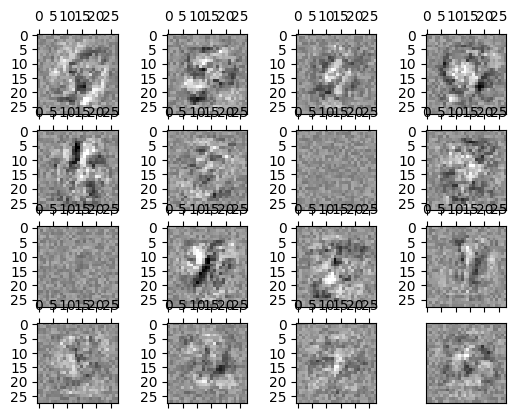

In [27]:
fig, axes = plt.subplots(4, 4)
# use global min / max to ensure all weights are shown on the same scale
vmin, vmax = mlp.coefs_[0].min(), mlp.coefs_[0].max()
for coef, ax in zip(mlp.coefs_[0].T, axes.ravel()):
    ax.matshow(coef.reshape(28, 28), cmap=plt.cm.gray, vmin=.5 * vmin, vmax=.5 * vmax)
ax.set_xticks(())
ax.set_yticks(())
plt.show()


### THE PARAMETER ALPHA

In [28]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import make_pipeline

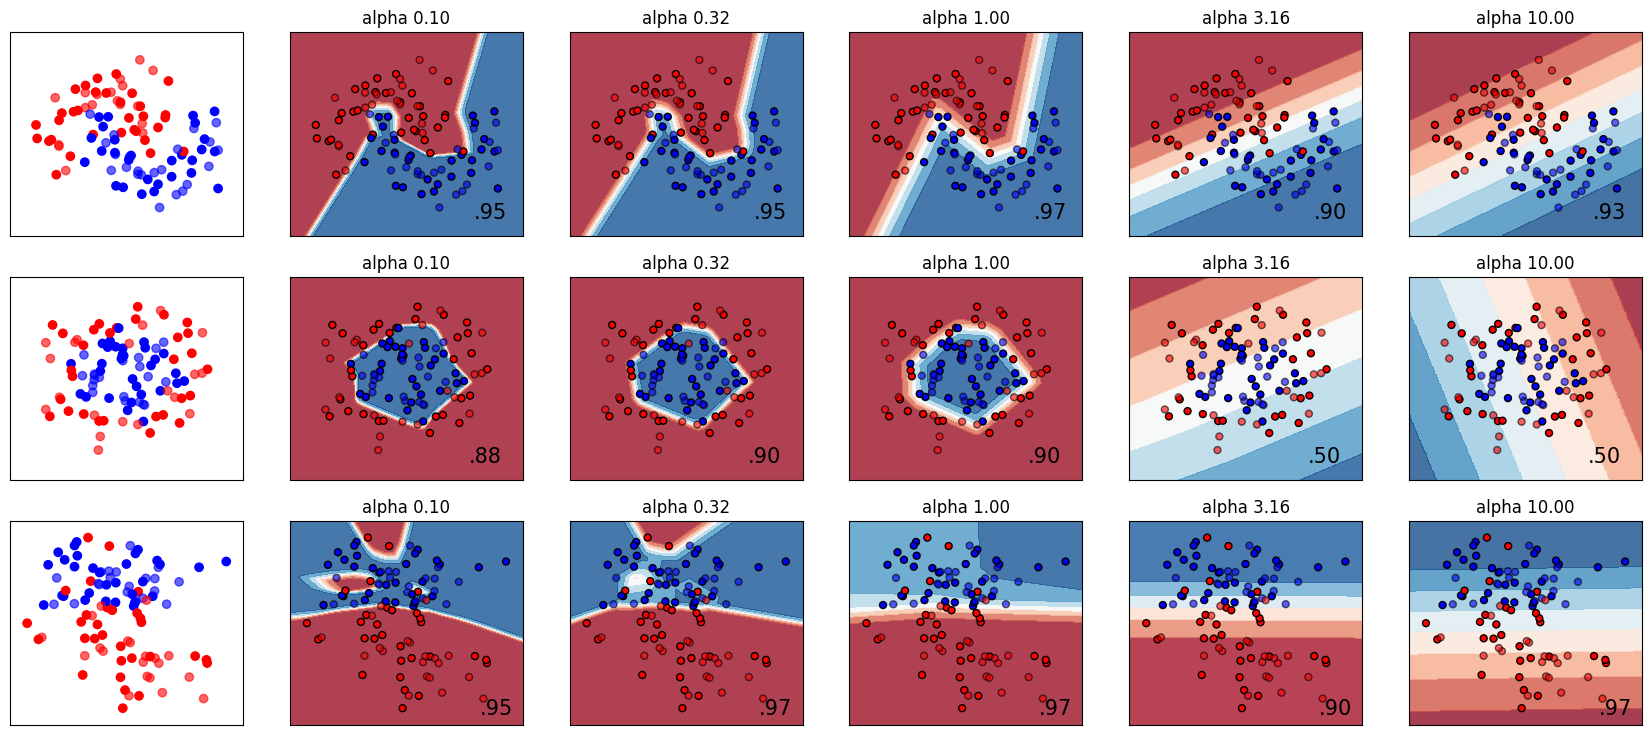

In [30]:
h = 0.02 # step size in the mesh
alphas = np.logspace(-1, 1, 5)
classifiers = []

names = []
for alpha in alphas:
    classifiers.append(make_pipeline(
                    StandardScaler(),
                    MLPClassifier(
                    solver='lbfgs', alpha=alpha, random_state=1, max_iter=2000,
                    early_stopping=True, hidden_layer_sizes=[100, 100],)))
    names.append(f"alpha {alpha:.2f}")
X, y = make_classification(n_features=2, n_redundant=0, n_informative=2,random_state=0, n_clusters_per_class=1)

rng = np.random.RandomState(2)
X += 2 * rng.uniform(size=X.shape)
linearly_separable = (X, y)

datasets = [make_moons(noise=0.3, random_state=0),
            make_circles(noise=0.2, factor=0.5, random_state=1),
            linearly_separable]
figure = plt.figure(figsize=(17, 9))
i = 1

# iterate over datasets
for X, y in datasets:
    # split into training and test part
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.4)
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),np.arange(y_min, y_max, h))
    # just plot the dataset first
    
    cm = plt.cm.RdBu
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright)
    
    # and testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6)
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1
    
    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
        score = clf.score(X_test, y_test)

        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max] x [y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=.8)
        
        # Plot also the training points
        ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,edgecolors='black', s=25)
        # and testing points
        ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright,alpha=0.6, edgecolors='black', s=25)
        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        ax.set_title(name)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % score).lstrip('0'),size=15, horizontalalignment='right')
        i += 1

figure.subplots_adjust(left=.02, right=.98)
plt.show()

